In [1]:
"""Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their
attributes such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more
than 10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment"""

"Predicting players rating\nIn this project you are going to predict the overall rating of soccer player based on their\nattributes such as 'crossing', 'finishing etc.\nThe dataset you are going to use is from European Soccer Database\n(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more\nthan 10,000 players for European professional soccer seasons from 2008 to 2016.\nDownload the data in the same folder and run the following commmand to get it in the environment"

In [2]:
import sqlite3
import mysql.connector as sql
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
# Create your connection.
cnx = sqlite3.connect(r'C:\Users\saran\database.sqlite\database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.shape

(183978, 42)

In [6]:
# checking null value 
missing_data = df.isnull().sum()
dtypes = df.dtypes
pct_missing = (missing_data/df.shape[0])*100

About = pd.DataFrame([missing_data,pct_missing,dtypes]).T

In [7]:
About.columns = ["missing" ,"pct_missing","dtype"]

About

,missing,pct_missing,dtype
id,0,0,int64
player_fifa_api_id,0,0,int64
player_api_id,0,0,int64
date,0,0,object
overall_rating,836,0.454402,float64
potential,836,0.454402,float64
preferred_foot,836,0.454402,object
attacking_work_rate,3230,1.75564,object
defensive_work_rate,836,0.454402,object
crossing,836,0.454402,float64


In [8]:
# imputing missing values
df = df.apply(lambda x : x.fillna(x.mean()) if x.dtypes=="int64" else x.fillna(x.mode()[0]))

In [9]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [10]:
df["date"] = pd.to_datetime(df.date)

In [11]:
# EDA

In [12]:
df["year_data"] = df["date"].dt.year

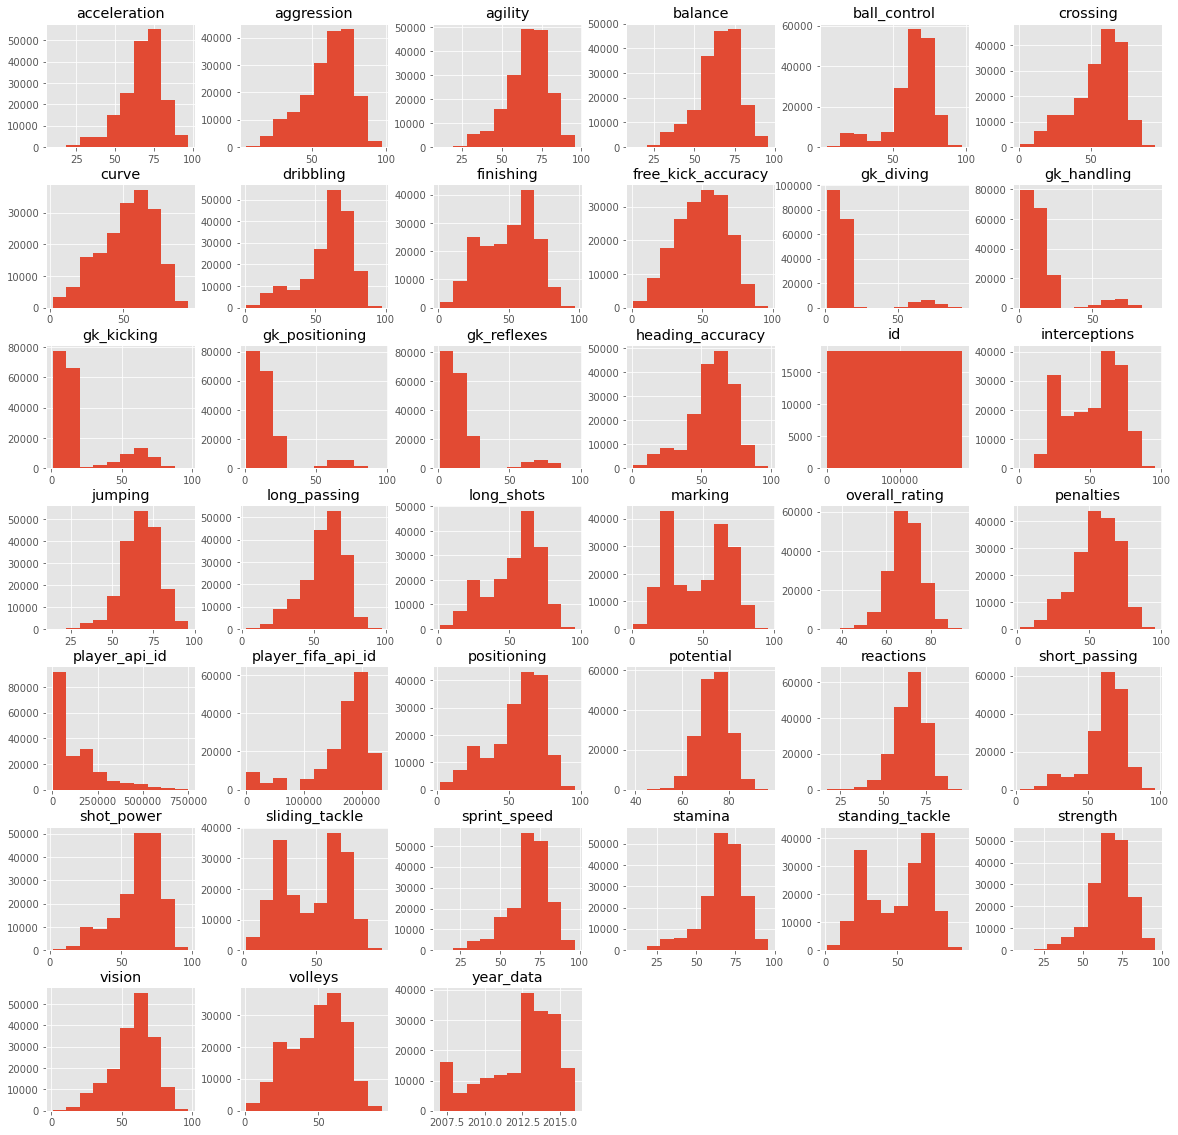

In [13]:
# check the distribution of data
_=df.hist(figsize=(20,20))

Text(0.5, 1.0, 'yearwise overall rating')

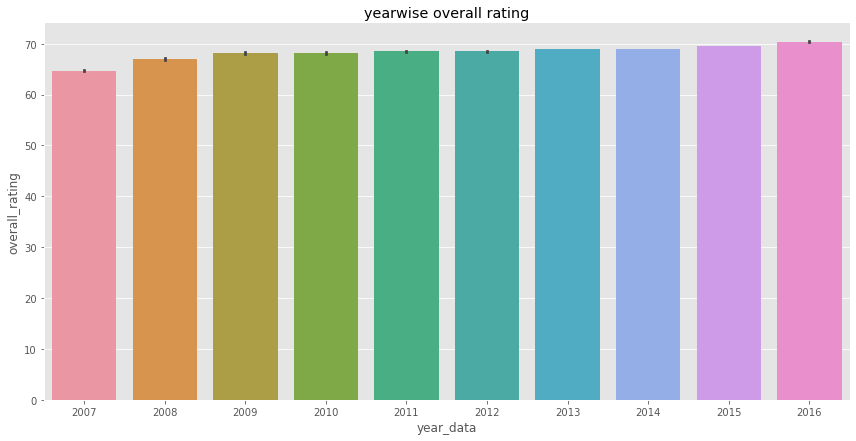

In [14]:
_=sns.catplot("year_data","overall_rating", data = df,kind="bar",height=6,aspect=2)
plt.title("yearwise overall rating")

Text(0.5, 1.0, 'foot by overall rating')

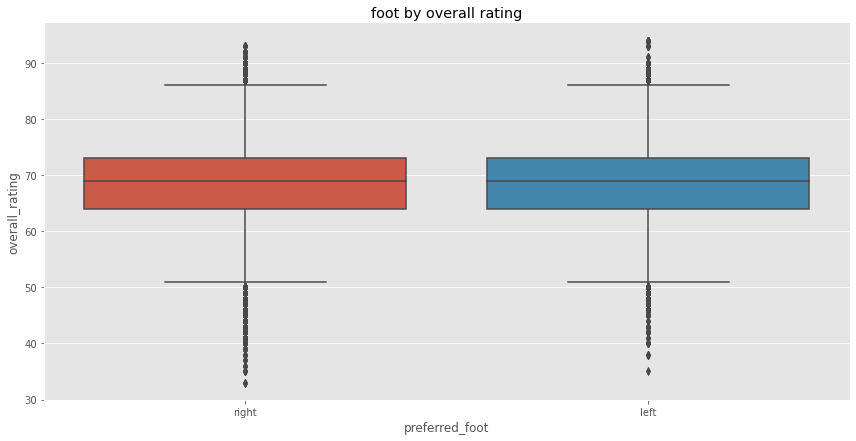

In [15]:
_=sns.catplot("preferred_foot","overall_rating", data = df,kind="box",height=6,aspect=2)
plt.title("foot by overall rating")

Text(0.5, 1.0, 'attacking_work_rate by overall rating')

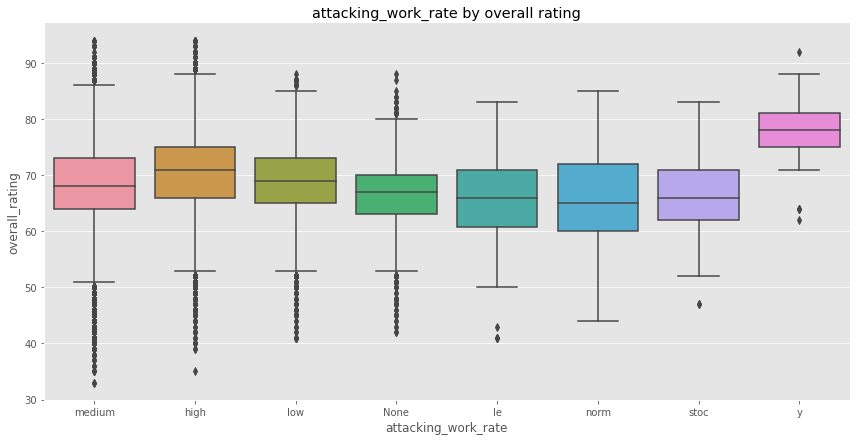

In [16]:
_=sns.catplot("attacking_work_rate","overall_rating", data = df,kind="box",height=6,aspect=2)
plt.title("attacking_work_rate by overall rating")

Text(0.5, 1.0, 'defensive_work_rate by overall rating')

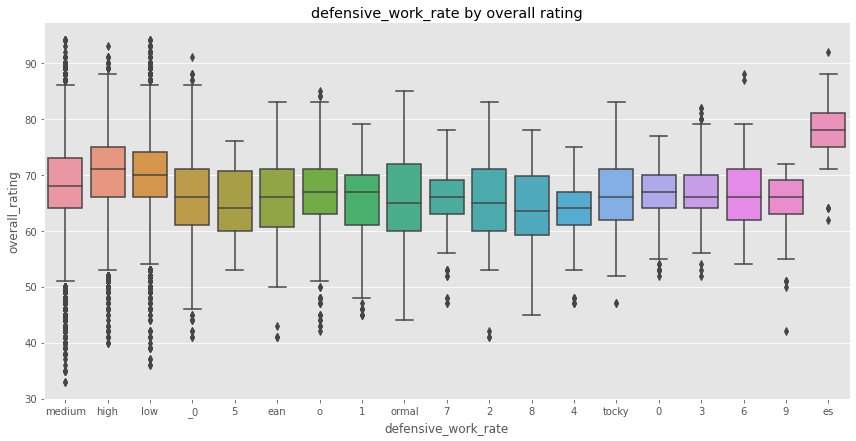

In [17]:
_=sns.catplot("defensive_work_rate","overall_rating", data = df,kind="box",height=6,aspect=2)
plt.title("defensive_work_rate by overall rating")

FEATURE ENGINEERING

In [18]:
df.drop(["id","player_fifa_api_id","player_api_id","date","year_data"],axis=1,inplace=True)

In [19]:
# checking the unique values in features
for i in df.columns:
    unique = df[i].unique()
    print(unique,i,"\n\n")

[67. 62. 61. 74. 73. 71. 70. 69. 68. 65. 64. 54. 51. 52. 47. 53. 66. 59.
 75. 72. 76. 78. 77. 79. 60. 80. 81. 82. 84. 48. 63. 83. 55. 58. 50. 56.
 49. 57. 42. 46. 45. 85. 44. 86. 89. 87. 88. 91. 40. 90. 41. 43. 38. 93.
 92. 39. 33. 36. 37. 35. 94.] overall_rating 


[71. 66. 65. 76. 75. 77. 78. 79. 80. 68. 64. 60. 67. 70. 72. 69. 82. 73.
 74. 81. 83. 86. 84. 85. 87. 90. 56. 57. 63. 62. 61. 59. 55. 58. 53. 89.
 54. 88. 52. 91. 92. 93. 51. 46. 44. 50. 47. 45. 95. 94. 48. 49. 42. 97.
 96. 39.] potential 


['right' 'left'] preferred_foot 


['medium' 'high' 'low' 'None' 'le' 'norm' 'stoc' 'y'] attacking_work_rate 


['medium' 'high' 'low' '_0' '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es'] defensive_work_rate 


[49. 48. 80. 79. 78. 77. 74. 58. 57. 22. 64. 65. 67. 69. 72. 73. 63. 56.
 59. 60. 46. 45. 75. 76. 47. 82. 71. 12. 62. 26. 70. 66. 40. 53. 55. 54.
 61. 39. 41. 42. 52. 68. 35. 34. 50. 38. 84. 81. 25. 11.  6. 23. 29. 36.
 44. 43. 51. 32. 33. 15. 14.  9. 21.

In [20]:
# labelling the ordinal features

label = LabelEncoder()
df["attacking_work_rate"] = label.fit_transform(df["attacking_work_rate"])
df["defensive_work_rate"] = label.fit_transform(df["defensive_work_rate"])


# create dummy variable
df["preferred_foot"] = df["preferred_foot"].map({"right":1,"left":0})

In [21]:
x = df.drop(["overall_rating"],axis=1)
y = df["overall_rating"]

In [22]:
# In the dataset all the features in the different scale so we need to feature scalling

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
# split the dataset

xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,random_state=11)

In [24]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(137983, 37)
(137983,)
(45995, 37)
(45995,)


In [25]:
class model_building:
    def __init__(self,xtrain,ytrain,xtest,ytest):
        self.xtrain = xtrain
        self.ytrain = ytrain
        self.xtest = xtest
        self.ytest = ytest
    
    def single_train_test(self,model):
        self.model = model
        lr = self.model
        lr.fit(self.xtrain,self.ytrain)
        train_score = lr.score(self.xtrain,self.ytrain)
        test_score = lr.score(self.xtest,self.ytest)
        return ("train score",train_score,"test score",test_score)
    
    
    
class cross_validation:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def cv_score(self,model):
        self.crossmodel = model
        score = cross_val_score(self.crossmodel,self.x,self.y,n_jobs=-1,verbose=3)
        return (np.mean(score))

class Client:
    def __init__(self):
        self.modelbuiding_obj = model_building(xtrain,ytrain,xtest,ytest)
        self.cross_validation_obj = cross_validation(x_scaled,y)

        
        
model_list = [LinearRegression(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

In [26]:
api = Client()

In [27]:
# Linear Regression
single_train_test = api.modelbuiding_obj.single_train_test(LinearRegression())
cv = api.cross_validation_obj.cv_score(LinearRegression())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


('train score', 0.8423494795874035, 'test score', 0.8383173766352834) 
 cv_score 0.8404450605020688


In [28]:
# Ridge Regression
single_train_test = api.modelbuiding_obj.single_train_test(Ridge())
cv = api.cross_validation_obj.cv_score(Ridge())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


('train score', 0.8423494794338886, 'test score', 0.8383174628620228) 
 cv_score 0.8404450981163913


In [29]:
# Lasso Regression
single_train_test = api.modelbuiding_obj.single_train_test(Lasso())
cv = api.cross_validation_obj.cv_score(Lasso())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


('train score', 0.7301934157678649, 'test score', 0.7268634639247704) 
 cv_score 0.7286929156655202


In [30]:
# Elasticnet
single_train_test = api.modelbuiding_obj.single_train_test(ElasticNet())
cv = api.cross_validation_obj.cv_score(ElasticNet())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


('train score', 0.7333463567486882, 'test score', 0.7302023683236032) 
 cv_score 0.7317192548375326


In [31]:
# Decisiontree
single_train_test = api.modelbuiding_obj.single_train_test(DecisionTreeRegressor())
cv = api.cross_validation_obj.cv_score(DecisionTreeRegressor())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.4s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished


('train score', 0.9993527192471694, 'test score', 0.9614597151412471) 
 cv_score 0.885075750922115


In [32]:
# RandomForestRegressor 
single_train_test = api.modelbuiding_obj.single_train_test(RandomForestRegressor())
cv = api.cross_validation_obj.cv_score(RandomForestRegressor())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.9min remaining: 14.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.0min finished


('train score', 0.9969999051898287, 'test score', 0.9825275814319049) 
 cv_score 0.9533362377234388


In [33]:
#  AdaAdaBoostRegressor
single_train_test = api.modelbuiding_obj.single_train_test(AdaBoostRegressor())
cv = api.cross_validation_obj.cv_score(AdaBoostRegressor())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


('train score', 0.8050145385987689, 'test score', 0.8050010507865997) 
 cv_score 0.8105632386693511


In [34]:
# Gradient boost Regression
single_train_test = api.modelbuiding_obj.single_train_test(GradientBoostingRegressor())
cv = api.cross_validation_obj.cv_score(GradientBoostingRegressor())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.4min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


('train score', 0.9371421865682474, 'test score', 0.9356211071429925) 
 cv_score 0.9345101341421074


In [35]:
# XGBRegressor
single_train_test = api.modelbuiding_obj.single_train_test(XGBRegressor())
cv = api.cross_validation_obj.cv_score(XGBRegressor())
print(single_train_test,"\n","cv_score",cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


('train score', 0.9753691325213865, 'test score', 0.969946366534361) 
 cv_score 0.9597771935025238


In [36]:
# Based on Above observation we have selected the Randomforestregressor because it performed well for unseen data

In [37]:
import pickle
import joblib

In [38]:
randomforest = RandomForestRegressor()
randomforest.fit(xtrain,ytrain)

RandomForestRegressor()

In [39]:
pickle.dump(randomforest,open("RandomforestRegressor.sav","wb"))

In [40]:
loaded_model = pickle.load(open("RandomforestRegressor.sav","rb"))

In [41]:
l = loaded_model.predict(xtest)
print(l)

[70.87 79.96 67.   ... 76.46 61.68 71.4 ]
